In [1]:
import pylab as plt
import numpy as np
import pandas as pd

# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import copy    

import scipy
from scipy import interpolate
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator


In [2]:
CLRS=["gray","firebrick","orchid","deepskyblue","orange","blueviolet","magenta","limegreen","pink","tomato","red","black","yellow","darkgreen"]

energies=[100,250,500,750,1000,1500,2000,3000,4000,5000,6000,7500,8500,10000,11000,12500,15000,20000,25000]
GeV=1000

NumToRun=1000

k=range(0,90,1)

In [3]:
with open('./MCeQ_Muons_interpolator_ALL.pkl', 'rb') as f:
    FluxMuons = pickle.load(f)

with open('./MCeQ_Muons_interpolator_ALL_Zatsep.pkl', 'rb') as f:
    FluxMuonsZat = pickle.load(f)
 

with open('./MCeQ_Muons_interpolator_ALL_EPOS-LHC.pkl', 'rb') as f:
    FluxMuonsEPOS = pickle.load(f)


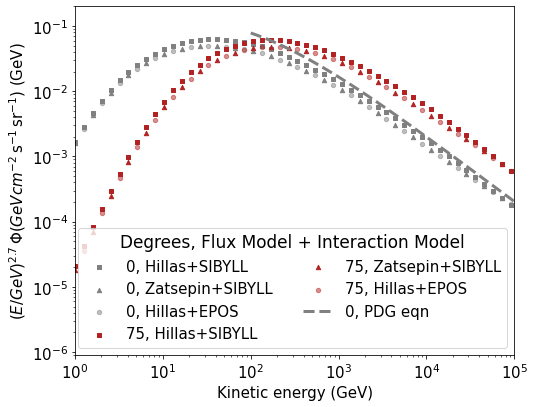

In [4]:
nrgs=np.geomspace(1,10**8,80)

#for comparing to PDG plot

plt.figure(figsize=(7,5.5))

clr=0
   
    
for theta in range(0,90,75):

    flxs=[]  
    flxsZat=[]
    flxsEPOS=[]
    err=[]
    
   
    for NG in nrgs:
        flxs.append(FluxMuons(np.deg2rad(theta),NG)[0][0]) #NG is energy in GeV, 650 is an altitude choice in meters
        flxsZat.append(FluxMuonsZat(theta,NG)[0][0]) #NG is energy in GeV, 650 is an altitude choice in meters
        flxsEPOS.append  (FluxMuonsEPOS(theta,NG)[0][0])     
    plt.scatter(nrgs, flxs*nrgs**-.3, label=str(theta)+', Hillas+SIBYLL',s=19,color=CLRS[clr],marker='s')
    plt.scatter(nrgs[::2], flxsZat[::2]*nrgs[::2]**-.3, label=str(theta)+', Zatsepin+SIBYLL',s=19,color=CLRS[clr],marker='^')

    plt.scatter(nrgs[1::2], flxsEPOS[1::2]*nrgs[1::2]**-.3, label=str(theta)+', Hillas+EPOS',s=19,color=CLRS[clr],alpha=.5,marker='o')

     #plt.scatter(x*GeV/10**6, y, label='_nolegend_',alpha=.3,s=8,color=CLRS[clr])      
    clr+=1


#plotting eqn from PDG
theta=0
clr+=1
    
pdgeq=[]    
EP=np.geomspace(100,10**5,50)  
theta=0
for E in EP:

    pdgeq.append(((.14)*(1/(1+1.1*E*np.cos(np.deg2rad(theta))/115)+.054/(1+1.1*E*np.cos(np.deg2rad(theta))/850))))

    
plt.plot(EP,pdgeq,label=str(theta)+', PDG eqn',linewidth=3,color=CLRS[0],linestyle='--')

   
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.xlim(1, 10**5)
plt.xlabel('Kinetic energy (GeV)',fontsize=15)
plt.ylim(.9*10**-6, .2)

plt.ylabel(r'$(E/ {GeV})^{2.7}\,\Phi (GeV cm^{-2}\,$s$^{-1}\,$sr$^{-1}$) (GeV)',fontsize=15)
plt.legend(fontsize=15,title='Degrees, Flux Model + Interaction Model',title_fontsize=17,ncol=2,loc='lower right')
#plt.savefig("./FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()

In [5]:
f=open("./MCEqFluxMeshes.pkl","rb")
EBins, cosas, gs, FluxMeshes= pickle.load(f)
f.close()

f=open("./MCEqFluxMeshes_Zat.pkl","rb")
EBinsZ, cosasZ, gsZ,FluxMeshesZat= pickle.load(f)
f.close()   

f=open("./MCEqFluxMeshes_Epos.pkl","rb")
EBinsE, cosasE, gsE,FluxMeshesEpos= pickle.load(f)
f.close()   

f=open("../Muon-Rate-Measurement/LinInterps.pkl","rb")
LinInterps=pickle.load(f)
f.close()

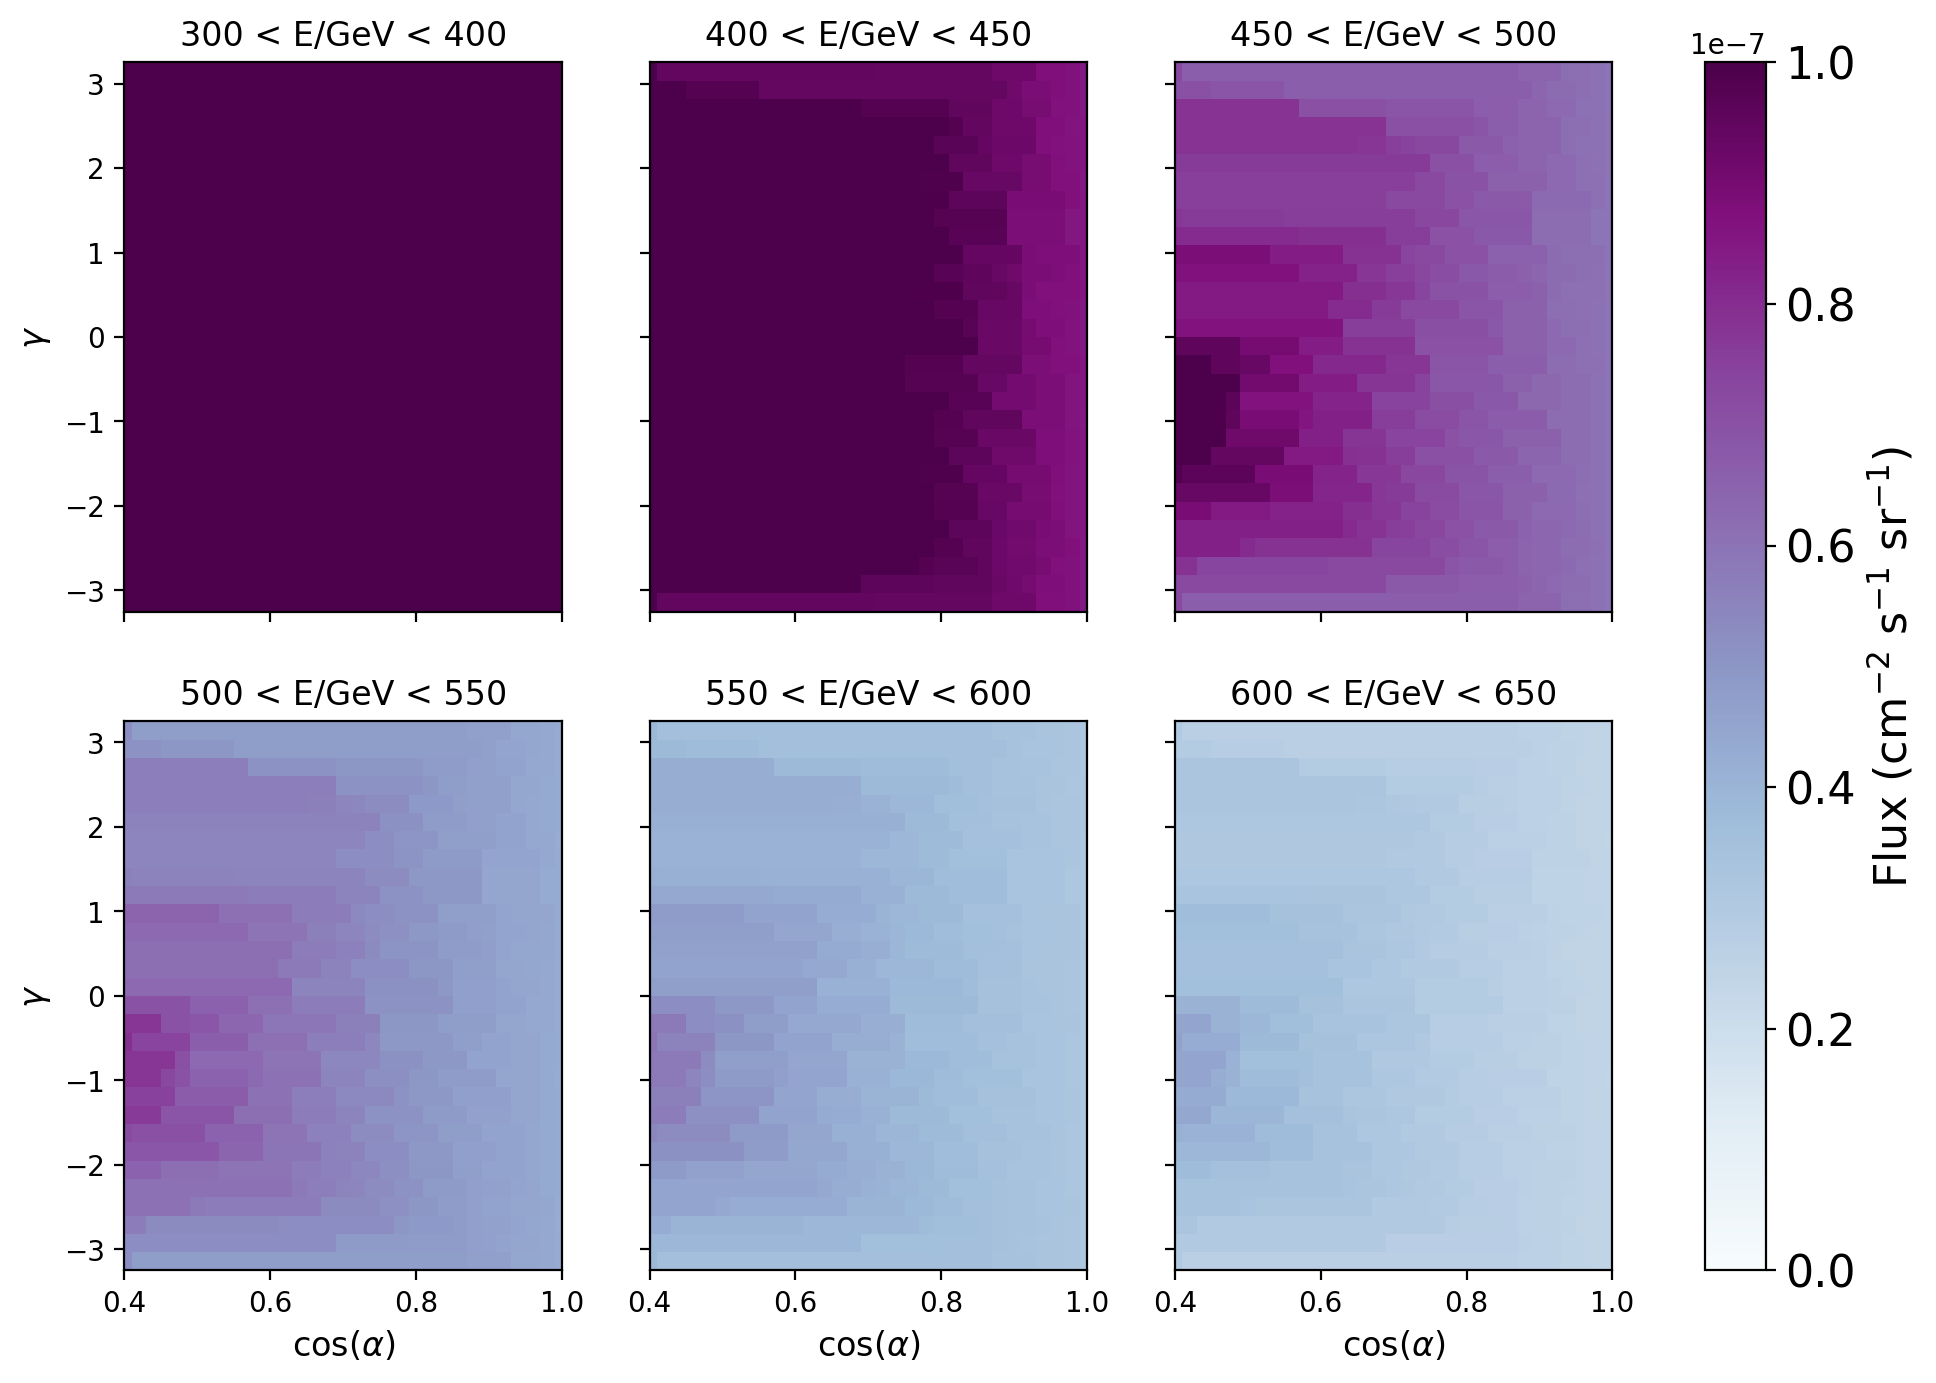

In [6]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,gs,np.transpose(FluxMeshes[iax+startn]),cmap='BuPu',shading='auto',vmin=0,vmax=1e-7)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\gamma$",fontsize=12)
axes[0,0].set_ylabel(r"$\gamma$",fontsize=12)

#plt.savefig('./MCeqFluxes.png',dpi=250,bbox_inches='tight')
plt.show()